In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [3]:
train.shape

(67463, 35)

In [4]:
train.duplicated().sum()

0

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [6]:
train.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [7]:
train.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [8]:
test = pd.read_csv('test.csv')
test.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,...,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,...,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,...,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,...,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,...,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


In [9]:
test.shape

(28913, 35)

In [10]:
test.isnull().sum()

ID                                  0
Loan Amount                         0
Funded Amount                       0
Funded Amount Investor              0
Term                                0
Batch Enrolled                      0
Interest Rate                       0
Grade                               0
Sub Grade                           0
Employment Duration                 0
Home Ownership                      0
Verification Status                 0
Payment Plan                        0
Loan Title                          0
Debit to Income                     0
Delinquency - two years             0
Inquires - six months               0
Open Account                        0
Public Record                       0
Revolving Balance                   0
Revolving Utilities                 0
Total Accounts                      0
Initial List Status                 0
Total Received Interest             0
Total Received Late Fee             0
Recoveries                          0
Collection R

In [11]:
train['Loan Status'].value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

In [12]:
combined = pd.concat([train, test], axis = 0)
combined.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0.0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0.0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0.0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0.0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0.0


In [13]:
combined.shape

(96376, 35)

In [14]:
combined['ID'].nunique()

96376

In [15]:
categorical_variables = train.select_dtypes(include= 'object')
categorical_variables.columns

Index(['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration',
       'Verification Status', 'Payment Plan', 'Loan Title',
       'Initial List Status', 'Application Type'],
      dtype='object')

In [16]:
numerical_variables = train.select_dtypes(exclude= 'object')
numerical_variables.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Home Ownership', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Total Received Interest', 'Total Received Late Fee',
       'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical',
       'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

<AxesSubplot:xlabel='Grade'>

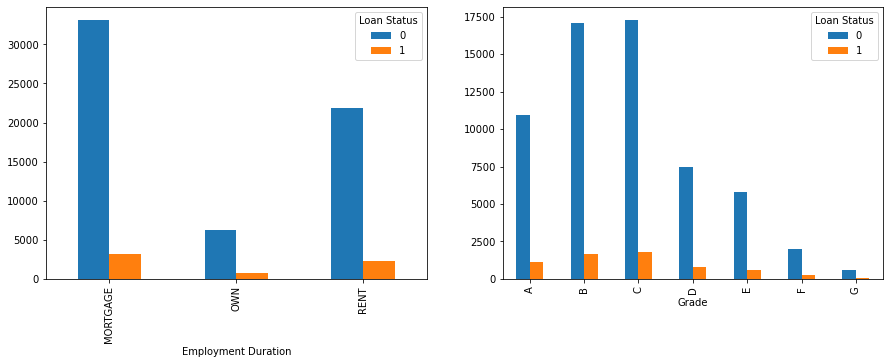

In [17]:
f,ax = plt.subplots(1,2,figsize=(15,5))
pd.crosstab(train['Employment Duration'], train['Loan Status']).plot.bar(ax=ax[0])
pd.crosstab(train['Grade'], train['Loan Status']).plot.bar(ax=ax[1])

<AxesSubplot:xlabel='Initial List Status'>

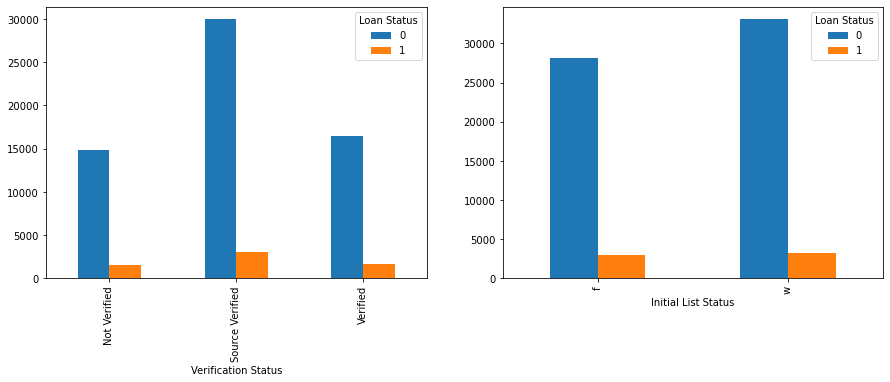

In [18]:
f,ax = plt.subplots(1,2,figsize=(15,5))
pd.crosstab(train['Verification Status'], train['Loan Status']).plot.bar(ax=ax[0])
pd.crosstab(train['Initial List Status'], train['Loan Status']).plot.bar(ax=ax[1])

<AxesSubplot:xlabel='Payment Plan'>

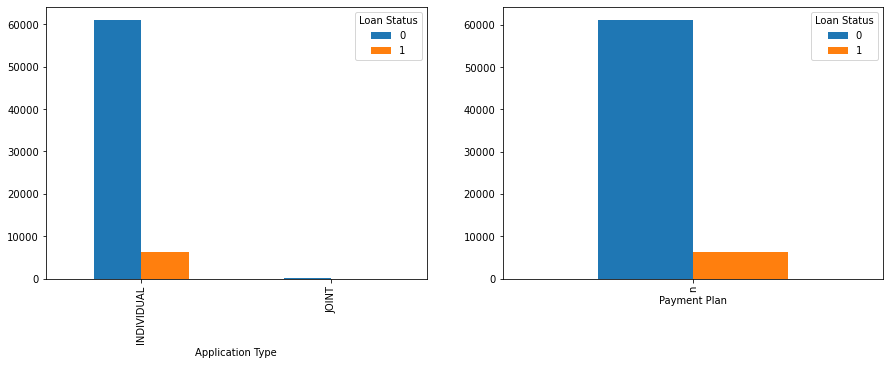

In [19]:
f,ax = plt.subplots(1,2,figsize=(15,5))
pd.crosstab(train['Application Type'], train['Loan Status']).plot.bar(ax=ax[0])
pd.crosstab(train['Payment Plan'], train['Loan Status']).plot.bar(ax=ax[1])

In [20]:
categorical_variables.columns

Index(['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration',
       'Verification Status', 'Payment Plan', 'Loan Title',
       'Initial List Status', 'Application Type'],
      dtype='object')

In [21]:
combined['Employment Duration'].value_counts()

MORTGAGE    51881
RENT        34683
OWN          9812
Name: Employment Duration, dtype: int64

In [22]:
combined['Grade'].value_counts()

C    27189
B    26738
A    17174
D    12211
E     9054
F     3128
G      882
Name: Grade, dtype: int64

In [23]:
combined['Verification Status'].value_counts()

Source Verified    46662
Verified           26059
Not Verified       23655
Name: Verification Status, dtype: int64

In [24]:
combined['Payment Plan'].value_counts()

n    96376
Name: Payment Plan, dtype: int64

In [25]:
combined['Loan Title'].value_counts()

Credit card refinancing       42084
Debt consolidation            37100
Debt Consolidation             4688
Other                          3561
Home improvement               3293
                              ...  
bills                             8
Personal loan                     8
Credit Card Refinance Loan        7
Getting Ahead                     7
Credit                            6
Name: Loan Title, Length: 109, dtype: int64

In [26]:
combined['Initial List Status'].value_counts()

w    52147
f    44229
Name: Initial List Status, dtype: int64

In [27]:
combined['Application Type'].value_counts()

INDIVIDUAL    96223
JOINT           153
Name: Application Type, dtype: int64

In [28]:
combined = combined.drop(['ID','Funded Amount', 'Funded Amount Investor','Batch Enrolled','Collection Recovery Fee','Collection 12 months Medical','Home Ownership','Total Collection Amount',
       'Total Current Balance','Payment Plan','Loan Title','Last week Pay','Initial List Status','Initial List Status',
            'Total Received Interest','Total Received Late Fee','Recoveries', 'Collection Recovery Fee','Collection 12 months Medical','Accounts Delinquent'], axis = 1)

In [29]:
combined.shape

(96376, 18)

In [30]:
combined.columns

Index(['Loan Amount', 'Term', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Verification Status', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Application Type', 'Total Revolving Credit Limit',
       'Loan Status'],
      dtype='object')

In [31]:
combined['CL_Ratio'] = combined['Open Account']/combined['Total Accounts']

In [32]:
combined = combined.drop(['Open Account', 'Total Accounts'], axis = 1)
combined.shape

(96376, 17)

In [33]:
combined['Employment Duration'] = combined['Employment Duration'].replace({'MORTGAGE': 2, 'RENT': 1, 'OWN': 0 })

In [34]:
combined['Employment Duration'] = combined['Employment Duration'].astype(int)

In [35]:
combined['Grade'] = combined['Grade'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 5, 'F': 6, 'G': 7})

In [37]:
combined['Grade'] = combined['Grade'].astype(int)

In [38]:
combined['Sub Grade'] = combined['Sub Grade'].replace({'G5': 0, 'G4': 1, 'G3': 2, 'G2': 3, 'G1': 4,
                        'F5': 5, 'F4': 6, 'F3': 7, 'F2': 8, 'F1': 9,
                        'E5': 10, 'E4': 11, 'E3': 12, 'E2': 13, 'E1': 14,
                        'D5': 15, 'D4': 16, 'D3': 17, 'D2': 18, 'D1': 19,
                        'C5': 20, 'C4': 21, 'C3': 22, 'C2': 23, 'C1': 24,
                        'B5': 25, 'B4': 26, 'B3': 27, 'B2': 28, 'B1': 29,
                        'A5': 30, 'A4': 31, 'A3': 32, 'A2': 33, 'A1': 34})

In [39]:
combined['Sub Grade'] = combined['Sub Grade'].astype(int)

In [40]:
combined['Application Type'] = combined['Application Type'].replace({'INDIVIDUAL': 1,  'JOINT': 2})

In [41]:
combined['Application Type'] = combined['Application Type'].astype(int)

In [42]:
combined['Verification Status'] = combined['Verification Status'].replace({'Source Verified':2,'Verified': 1,'Not Verified': 0})

In [43]:
combined['Verification Status'] = combined['Verification Status'].astype(int)

In [44]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96376 entries, 0 to 28912
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   96376 non-null  int64  
 1   Term                          96376 non-null  int64  
 2   Interest Rate                 96376 non-null  float64
 3   Grade                         96376 non-null  int32  
 4   Sub Grade                     96376 non-null  int32  
 5   Employment Duration           96376 non-null  int32  
 6   Verification Status           96376 non-null  int32  
 7   Debit to Income               96376 non-null  float64
 8   Delinquency - two years       96376 non-null  int64  
 9   Inquires - six months         96376 non-null  int64  
 10  Public Record                 96376 non-null  int64  
 11  Revolving Balance             96376 non-null  int64  
 12  Revolving Utilities           96376 non-null  float64
 13  A

In [45]:
newtrain = combined.iloc[0:67463, :]
newtrain.shape

(67463, 17)

In [46]:
newtest = combined.iloc[67463: , :]
newtest = newtest.drop('Loan Status', axis = 1)
newtest.shape

(28913, 16)

In [47]:
x = newtrain.drop('Loan Status', axis = 1)
y = newtrain['Loan Status']

In [48]:
from sklearn.metrics import log_loss, accuracy_score

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 ,random_state = 1)

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [51]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='saga', max_iter=500, random_state=1)
y_pred = lr.fit(x_train, y_train).predict(x_test)
print(log_loss(y_test, y_pred))

3.1945744416251793


In [53]:
print(accuracy_score(y_test, y_pred))

0.9075075965315349


In [54]:
print('training score', lr.score(x_train, y_train))
print('test score', lr.score(x_test, y_test))

training score 0.9074856401704651
test score 0.9075075965315349


In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gab = GradientBoostingClassifier()
y_pred = gab.fit(x_train, y_train).predict(x_test)
print(log_loss(y_test, y_pred))

3.1971342560469047


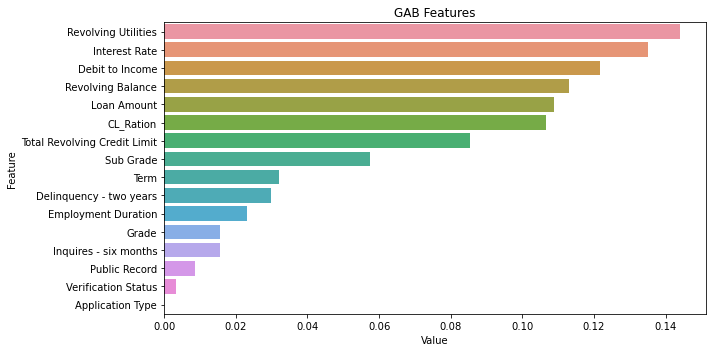

In [66]:
feature_imp = pd.DataFrame(sorted(zip(gab.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('GAB Features')
plt.tight_layout()
plt.show()

In [148]:
x_train = newtrain[['Revolving Utilities', 'Interest Rate', 'Debit to Income', 'Revolving Balance', 'Loan Amount', 'CL_Ratio',
                   'Total Revolving Credit Limit']]
y_train = newtrain['Loan Status']
x_test = newtest[['Revolving Utilities', 'Interest Rate', 'Debit to Income', 'Revolving Balance', 'Loan Amount', 'CL_Ratio',
                   'Total Revolving Credit Limit']]

In [149]:
from sklearn.ensemble import GradientBoostingClassifier
gab = GradientBoostingClassifier()
y_pred = gab.fit(x_train, y_train).predict(x_test)

In [150]:
solution = pd.DataFrame({'Loan Status' : y_pred})
solution.to_csv('Solution.csv', index = False)